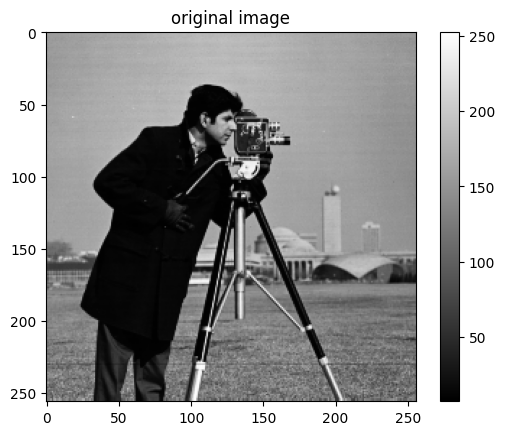

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import torch as th

from thgsp.filters import BiorthCore
from thgsp.utils import img2graph

cmm = mpimg.imread("./cameraman.tif")
plt.figure(1)
plt.title("original image")
plt.imshow(cmm, cmap="gray")
plt.colorbar()
plt.show()

In [14]:
Ar, Ad, beta_r, beta_d, pixels, xy = img2graph(cmm, grid=True, threshold=60)
bptG = [Ar, Ad]
beta = np.stack([beta_r, beta_d]).T

# build graphBior in one line
fb = BiorthCore(bptG, beta, k=6, order=12)

In [15]:
signal = th.from_numpy(cmm.reshape(-1))
# analysis in one line
coeff = fb.analyze(signal)
# synthesis in one line
f_hat = fb.synthesize(coeff)

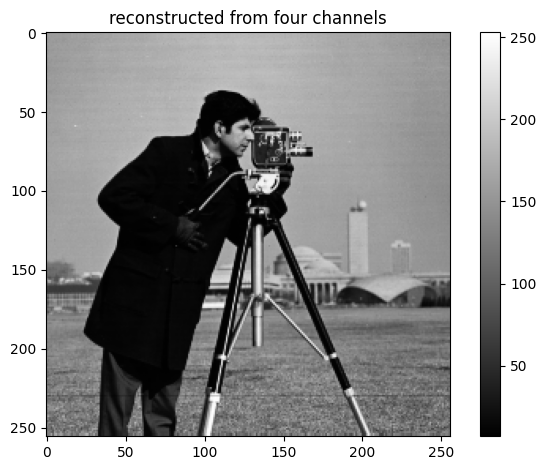

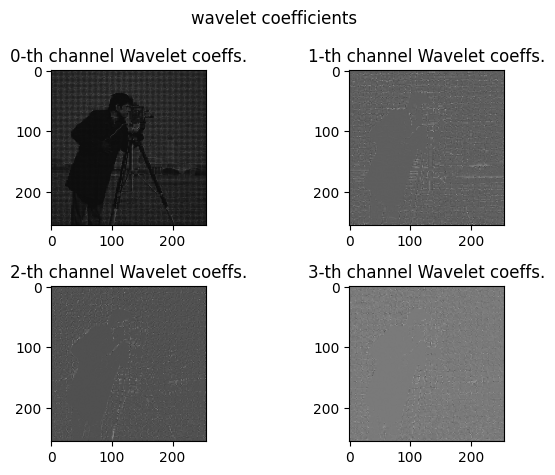

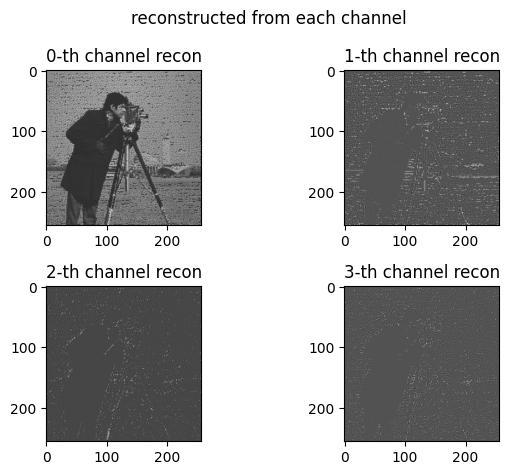

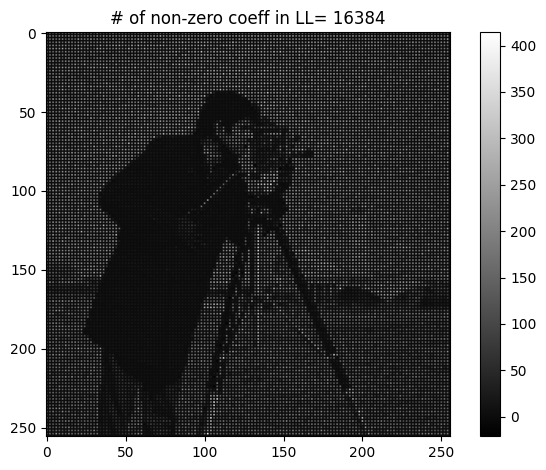

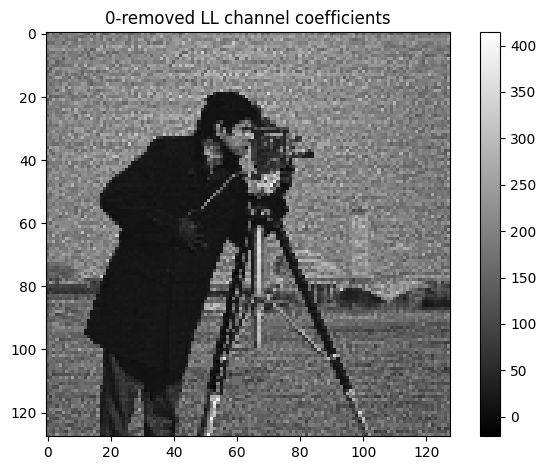

In [16]:
# visualization results
plt.figure(2)
plt.title("reconstructed from four channels")
plt.imshow(f_hat.sum(0).reshape(256, 256), cmap="gray")
plt.colorbar()
plt.tight_layout()


plt.figure(3)
plt.suptitle("wavelet coefficients")
for i in range(coeff.shape[0]):
    plt.subplot(int("22{}".format(i + 1)))
    plt.title("{}-th channel Wavelet coeffs.".format(i))
    plt.imshow(coeff[i].reshape(256, 256), cmap="gray")
plt.tight_layout()


plt.figure(4)
plt.suptitle("reconstructed from each channel")
for i in range(f_hat.shape[0]):
    plt.subplot(int("22{}".format(i + 1)))
    plt.title("{}-th channel recon".format(i))
    plt.imshow(f_hat[i].reshape(256, 256), cmap="gray")
plt.tight_layout()

plt.figure(5)
plt.title("# of non-zero coeff in LL= {}".format(len(coeff[0].nonzero())))
plt.imshow(coeff[0].reshape(256, 256), cmap="gray")
plt.colorbar()
plt.tight_layout()


plt.figure(6)
plt.title("0-removed LL channel coefficients")
c0 = coeff[0]
c0 = c0[c0 != 0]
plt.imshow(c0.reshape(128, 128), cmap="gray")
plt.colorbar()
plt.tight_layout()

plt.show()


